# Métodos Numericos 2022

## Parcial 2 - Tema 1 - 7 de Junio de 2022

### No olvide ingresar su(s):

**APELLIDO(S):D'Paula**

**NOMBRE(S):Roberto Renzo**

Al **finalizar el examen**, Ud. tiene que **subir** la notebook al **Moodle** (aula virtual)

https://famaf.aulavirtual.unc.edu.ar

y enviar por email una copia de seguridad al profesor del teórico, Francisco A. Tamarit (Pancho)

  [francisco.tamarit@unc.edu.ar](francisco.tamarit@unc.edu.ar)
    
Si por alguna eventualidad no puede subir el examen al Moodle, alternativamente, envíe el examen por email a los profesores del práctico de Julia, Oscar Reula `oreula@unc.edu.ar` y Juan I. Perotti `juan.perotti@unc.edu.ar`.

### Nota sobre la programación en Julia

Recuerde que su notebook tiene que poder ser entendida por otra persona. Para ello:

* Cuando crea conveniente, use texto Markdown para desarrollar o comentar una idea.

* Si lo considera necesario, agregue comentarios a su código.

* Realice gráficos que tengan etiquetas en los ejes y leyendas para cada curva o serie de puntos graficados, como así también un título apropiado.

* Procure respetar reglas de buena programación:

    * Use sangrías adecuadamente.

    * Cuando sea posible, implemente funciones de caracter general, en vez de código específico a cada problema, facilitando así la reutilización de código.

    * Implemente funciones que tengan los argumentos necesarios para su buen funcionamiento.

In [1]:
using Plots
using LaTeXStrings

## Problema 1

Considere la integral definida
$$
I = \int_a^b \frac{1}{1 + x^2} dt = \arctan(x)\bigg|_a^b
$$
con $a=0$ y $b=4$.

**a)** Grafique el integrando en el intervalo de interés.

**b)** Escriba un programa que calcule aproximaciones $A(n)$ de la integral considerada, empleando la regla compuesta del **trapecio**.

El programa debe tomar como entrada:

* una función `f` que represente el integrando,
* los extremos `a` y `b` del intervalo de integración, y
* el número `n` de divisiones del intervalo de integración.

**c)** Escriba otro programa que calcule la integral empleando la regla compuesta de **Simpson**.

**d)** Siendo $\varepsilon(n)=|A(n)-I|$ el error absoluto para una elección de $n$, y notando que $h=(b-a)/n$, verifique que el cociente de precisión, definido como 
$$
Q(h) = \frac{\varepsilon(h)}{\varepsilon(h/2)} \, ,
$$
toma un valor aproximado a $4$ para todo $h$ cuando se usa la regla del **trapecio**, y un valor aproximado a $16$ para todo $h$ cuando se usa la regla de **Simpson**.
Utilice para estos cálculos, los valores $n = 2^k$ para $k=1,...,12$.

Teniendo en cuenta la expresión del error de truncamiento para cada caso, justifique estos resultados.

**e)** En un mismo gráfico y para cada método, calcule y grafique el error relativo $\varepsilon_r(n) = \varepsilon(n)/|I|$ vs $n$ en escala *log-log*. Ud. debería observar que
\begin{eqnarray}
\varepsilon_r(n) & \approx & Cn^{-\alpha} \\
\end{eqnarray}
o, equivalentemente,
\begin{eqnarray}
\ln \varepsilon_r(n) & \approx & -\alpha \ln n + C
\end{eqnarray}
donde $\alpha$ y $C$ son constantes.
Esto significa que existe una dependencia tipo ley de potencia entre $\varepsilon_r(n)$ y $n$, la cual se manifiesta como una recta de pendiente $\alpha$ en un gráfico de escala *log-log*. 

**f)** Para cada uno de los métodos de integración, use el gráfico para estimar el exponente $\alpha$. Para ello, incluya en el gráfico curvas de de la forma $f(n)=A n^{-\beta}$ vs $n$, probando distintos valores de $\beta$ hasta encontrar que las mismas solapan aproximadamente con las líneas de puntos $\varepsilon_r(n)$ vs $n$. Justifique los valores de $\beta$ hallados.

***a)***

In [2]:
a=0
b=4
g(x)=1/(1+x^2)

g (generic function with 1 method)

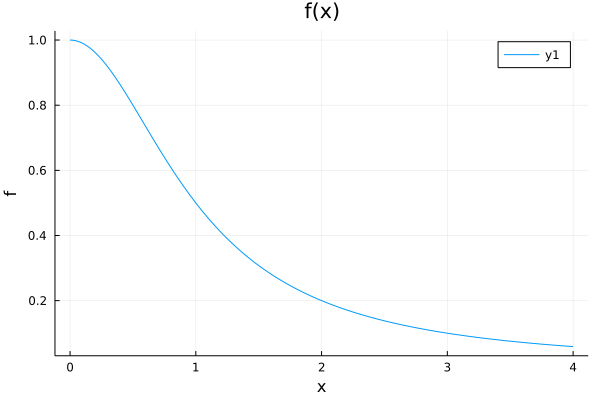

In [3]:
plot(a:0.01:b,g,
title="f(x)",
xlabel="x",
ylabel="f")

***b)***

In [310]:
function trapecio_compuesto(f,a,b,n)
    St=0
    h=(b-a)/(n-1)
    x0=a
    for i=1:n-2
        x1=a+i*h
        St+=f(x1)
        #println("$i, $St, $x1")
    end
    return h*((f(a)+f(b))/2 + St)
end

trapecio_compuesto (generic function with 1 method)

In [311]:
n=17
It1=trapecio_compuesto(g,a,b,n)

1.3256735817329137

***c)***

In [347]:
function Simpson_compuesto(f,a,b,n)       ### Con n impar i.e intervalos pares 
    @assert n%2==1
    Sp=0
    Si=0
    h=(b-a)/(n-1)
    x0=a
    for i=1:(n-1)/2
        x1=a+(2*i-1)*h
        Si+=f(x1)
        #println("$i, $Ss, $x2")
    end
    for i=1:(((n-1)/2)-1)
        x2=a+2*i*h
        Sp+=f(x2)
        #println("$i, $Ss, $x2")
    end
    return (h/3)*(f(a) + 2*Sp + 4*Si + f(b))
end

Simpson_compuesto (generic function with 1 method)

In [348]:
n=17
Is1=Simpson_compuesto(g,a,b,n)

1.325813641478192

***d)***

**Solución exacta**

In [349]:
k(x)=atan(x)
I_exacta=k(b)-k(a)

1.3258176636680326

***Coeficiente de precisión para el Trapecio***

In [376]:
h1=0.1
n1=(b-a)/h1-1

39.0

In [377]:
It1=trapecio_compuesto(g,a,b,n1)

1.3257921064398537

In [378]:
e_h1=abs(It1-I_exacta)

2.555722817887407e-5

In [379]:
h2=0.05
n2=(b-a)/h2-1

79.0

In [380]:
It2=trapecio_compuesto(g,a,b,n2)

1.3258115972851108

In [381]:
e_h2=abs(It2-I_exacta)

6.066382921776636e-6

In [382]:
Q=e_h1/e_h2

4.212926962973388

***Coeficiente de precisión para Simpson***

In [383]:
Is1=Simpson_compuesto(g,a,b,n1)

1.3258176519299254

In [384]:
e_h1=abs(Is1-I_exacta)

1.173810715293655e-8

In [385]:
Is2=Simpson_compuesto(g,a,b,n2)

1.3258176630058702

In [386]:
e_h2=abs(Is2-I_exacta)

6.621623249714048e-10

In [388]:
Q=e_h1/e_h2

17.726932974393332

In [399]:
n1=[2^k for k=1:12]

12-element Vector{Int64}:
    2
    4
    8
   16
   32
   64
  128
  256
  512
 1024
 2048
 4096

In [405]:
n2=[2*2^k for k=1:12]

12-element Vector{Int64}:
    4
    8
   16
   32
   64
  128
  256
  512
 1024
 2048
 4096
 8192

In [410]:
It1=zeros(length(n))
for i=1:length(n)
    It1[i]=trapecio_compuesto(g,a,b,n1[i])
end

In [412]:
It2=zeros(length(n))
for i=1:length(n)
    It2[i]=trapecio_compuesto(g,a,b,n2[i])
end

In [415]:
e_h1=[abs(It1[i]-I_exacta) for i=1:12]

12-element Vector{Float64}:
 0.02444825091697944
 0.0006980131984557492
 0.00016391848573160672
 3.840011007838484e-5
 9.298900703225144e-6
 2.2883316466160153e-6
 5.676091812123474e-7
 1.4134771886276098e-7
 3.526789593699675e-8
 8.808363149981346e-9
 2.2010178124531876e-9
 5.501190614154439e-10

In [418]:
e_h2=[abs(It2[i]-I_exacta) for i=1:12]

12-element Vector{Float64}:
 0.02444825091697944
 0.0006980131984557492
 0.00016391848573160672
 3.840011007838484e-5
 9.298900703225144e-6
 2.2883316466160153e-6
 5.676091812123474e-7
 1.4134771886276098e-7
 3.526789593699675e-8
 8.808363149981346e-9
 2.2010178124531876e-9
 5.501190614154439e-10

**d)** Siendo $\varepsilon(n)=|A(n)-I|$ el error absoluto para una elección de $n$, y notando que $h=(b-a)/n$, verifique que el cociente de precisión, definido como 
$$
Q(h) = \frac{\varepsilon(h)}{\varepsilon(h/2)} \, ,
$$
toma un valor aproximado a $4$ para todo $h$ cuando se usa la regla del **trapecio**, y un valor aproximado a $16$ para todo $h$ cuando se usa la regla de **Simpson**.
Utilice para estos cálculos, los valores $n = 2^k$ para $k=1,...,12$.

Teniendo en cuenta la expresión del error de truncamiento para cada caso, justifique estos resultados.

**e)** En un mismo gráfico y para cada método, calcule y grafique el error relativo $\varepsilon_r(n) = \varepsilon(n)/|I|$ vs $n$ en escala *log-log*. Ud. debería observar que
\begin{eqnarray}
\varepsilon_r(n) & \approx & Cn^{-\alpha} \\
\end{eqnarray}
o, equivalentemente,
\begin{eqnarray}
\ln \varepsilon_r(n) & \approx & -\alpha \ln n + C
\end{eqnarray}
donde $\alpha$ y $C$ son constantes.
Esto significa que existe una dependencia tipo ley de potencia entre $\varepsilon_r(n)$ y $n$, la cual se manifiesta como una recta de pendiente $\alpha$ en un gráfico de escala *log-log*. 

**f)** Para cada uno de los métodos de integración, use el gráfico para estimar el exponente $\alpha$. Para ello, incluya en el gráfico curvas de de la forma $f(n)=A n^{-\beta}$ vs $n$, probando distintos valores de $\beta$ hasta encontrar que las mismas solapan aproximadamente con las líneas de puntos $\varepsilon_r(n)$ vs $n$. Justifique los valores de $\beta$ hallados.

***e)***

## Problema 2

**a)** Escriba un programa a los fines de resolver el problema de valor inicial **multidimensional**:
$$
\dot{y}(t) = f(y,t), \qquad a\le t\le b, \qquad y(a)=y_0
$$
que utilice el método de **Euler** 
\begin{eqnarray}
w_1 &=& y_0 \\
t_{i+1} &=& t_i + h,\;\;\;\; i=1,2,...,n-1 \\
w_{i+1} &=& w_i + hf(w_i,t_i) \\
\end{eqnarray}
y el método de **Runge-Kutta de orden 4** 
\begin{eqnarray}
w_1 &=& y_0 \\
t_{i+1} &=& t_i + h,\;\;\;\; i=1,2,...,n-1 \\
k_1 &=& hf(w_i,t_i) \\
k_2 &=& hf(w_i+k_1/2,t_i+h/2) \\
k_3 &=& hf(w_i+k_2/2,t_i+h/2) \\
k_4 &=& hf(w_i+k_3,t_i+h) \\
w_{i+1} &=& w_i + \frac{1}{6}(k_1+2k_2+2k_3+k_4) \\
\end{eqnarray}

En el programa principal se deben proporcionar los siguientes valores:

1. los límites $a$ y $b$ (inferior y superior) del intervalo temporal de integración,

2. la condición inicial $y_0$, y

3. el número de puntos de aproximación, $n$.

**Ayuda:** les recomendamos implementar el programa en términos de las siguientes funciones:

* Una función `Euler(f,w,t,h,p)` que calcule un paso de integración del método de Euler,
* una función `RK4(f,w,t,h,p)` que calcule un paso de integración del método de RK4,
* una función `ODEproblem(method,f,y0,(a,b),n)` que integre los pasos de integración del método `method`, y
* una función `f(y,t,p)` que represente el lado derecho del sistema de ecuaciones diferenciales ordinarias en consideración.

Aquí, `p` es un vector representanto los parámetros constantes del sistema, y la función `ODEproblem` es la que retorna el vector de tiempos $t_i$ y el vector de aproximaciones $w_i$.

**b)**
Utilice el programa del punto **a)** para resolver, **usando ambos métodos**, el siguiente problema de valor inicial

\begin{eqnarray}
\dot{y}(t) = t - ty(t), \;\;\;\; y_0=2
\end{eqnarray}

para $a=0$, $b=4$, $y_0=2$, y los siguientes pasos de integración:

* $h=0.1$,
* $h=0.01$, y
* $h=0.001$.

La solución exacta del problema es
\begin{eqnarray}
y_e(t) = 1+e^{-t^2/2}
\end{eqnarray}

**Ayuda:** Note que $n$ puntos de aproximación corresponden a $n-1$ pasos de integración de longitud $h=(b-a)/(n-1)$.

**c)** En un mismo gráfico, grafique la solución exacta y las aproximaciones calculadas con $h=0.1$ de las curva $y(t)$ vs $t$. Use una línea contínua negra para la solución exacta, y puntos de diferentes colores/estilos para las 2 aproximaciones.

**d)** En un mismo gráfico, y en escala logarítmica vs lineal, grafique el error absoluto $|w_i-y_e(t_i)|$ vs $t_i$ para ambos métodos, y los valores de $h=0.1$ y $0.01$. Utilice **puntos** de distintos colores/estilos para diferenciar los diferentes casos.

**Ayuda:** La escala logarítmica vs lineal, o log-lin, es logarítmica en $y$ y lineal en $x$.

**e)** En un mismo gráfico, y en escala log-log, grafique el error absoluto global definido por $|w_n-f(t_n)|$ vs $h$ para ambos métodos.
Incluya, para cada caso, una curva de la forma $Ah^{\beta}$ vs $h$, ajustando a ojo los valores de $A$ y $\beta$ para que la curva imite los datos numéricos.

**Ayuda 1:** Una curva $y = Ah^{\beta}$ vs $x = h$ en escala lin-lin, se convierte a una curva $y'=\ln y = \beta\ln h + \ln A = \beta x' + C$ vs $x' = \ln x = \ln h$ en escala log-log. 
Es decir, en escala log-log, observaremos una recta de pendiente $\beta$ y ordenada $C=\ln A$.

**Ayuda 2:** Recuerde que $\beta$ está relacionado al orden del método de integración, por lo que conviene probar valores enteros $\beta \in \mathbb{Z}$.
Para la otra constante, pruebe valores espaciados exponencialmente, $A=10^k$ para $k\in \mathbb{Z}$.

**f)** En una celda Markdown, comente los resultados obtenidos en los distintos gráficos.

***a)***

In [6]:
function iteracion_ODES_multidumencional(Metodo,f,y0,(a,b),N,p)
    t = zeros(N)
    w = zeros(length(y0),N)
    h = (b-a)/(N-1)
    t[1] = a
    w[:,1] = y0
    for i in 2:N
        t[i] = t[i-1]+h
        w[:,i] = Metodo(f,t[i-1],w[:,i-1],h,p)
    end
    return t[:],w[:,:]
end

iteracion_ODES_multidumencional (generic function with 1 method)

In [7]:
"1er paso metodo de Euler"
function Euler(f,t0,y0,h,p)
    return y0 + h*f(t0, y0, p)                ### p: parametros o constantes de f
end

Euler

In [8]:
"1er paso metodo Runge-Kutta 4"
function RK4(f,t0,y0,h,p)
    k1 = f(t0, y0, p)
    k2 = f(t0+h/2, y0+h/2*k1, p)
    k3 = f(t0+h/2, y0+h/2*k2, p)
    k4 = f(t0+h, y0+h*k3, p)
    return y0 + (h/6)*(k1 + 2*k2 + 2*k3 + k4)      ### y0 + h/6(k1 + 2*k2 + 2*k3 + k4) No anda
end

RK4

In [45]:
function f(t,w,p)
return [t-t*w[1]]                                                  
end

f (generic function with 1 method)

***b)***

In [72]:
ye(t)=1+exp(-(t^2)/2)

ye (generic function with 1 method)

***Con Euler***

In [103]:
y0=[2.0]
a=0
b=4
N=40          ### h=0,1
p=0
f(1,y0,p)
te1,we1=iteracion_ODES_multidumencional(Euler,f,y0,(a,b),N,p)

([0.0, 0.10256410256410256, 0.20512820512820512, 0.3076923076923077, 0.41025641025641024, 0.5128205128205128, 0.6153846153846153, 0.7179487179487178, 0.8205128205128204, 0.9230769230769229  …  3.0769230769230784, 3.179487179487181, 3.2820512820512837, 3.3846153846153864, 3.487179487179489, 3.5897435897435916, 3.6923076923076943, 3.794871794871797, 3.8974358974358996, 4.000000000000002], [2.0 2.0 … 1.0001802062778613 1.000108171158243])

In [104]:
N=400          ### h=0,01
te2,we2=iteracion_ODES_multidumencional(Euler,f,y0,(a,b),N,p)

([0.0, 0.010025062656641603, 0.020050125313283207, 0.03007518796992481, 0.040100250626566414, 0.05012531328320802, 0.06015037593984962, 0.07017543859649122, 0.08020050125313283, 0.09022556390977443  …  3.909774436090183, 3.9197994987468245, 3.929824561403466, 3.9398496240601073, 3.9498746867167487, 3.95989974937339, 3.9699248120300314, 3.979949874686673, 3.989974937343314, 3.9999999999999556], [2.0 2.0 … 1.000319789864678 1.0003069983504396])

In [105]:
N=4000          ### h=0,001
te3,we3=iteracion_ODES_multidumencional(Euler,f,y0,(a,b),N,p)

([0.0, 0.001000250062515629, 0.002000500125031258, 0.003000750187546887, 0.004001000250062516, 0.005001250312578145, 0.0060015003750937745, 0.007001750437609404, 0.008002000500125032, 0.009002250562640661  …  3.990997749437097, 3.9919979994996124, 3.992998249562128, 3.9939984996246434, 3.994998749687159, 3.9959989997496743, 3.99699924981219, 3.9979994998747053, 3.9989997499372207, 3.999999999999736], [2.0 2.0 … 1.0003338969332354 1.000332561345586])

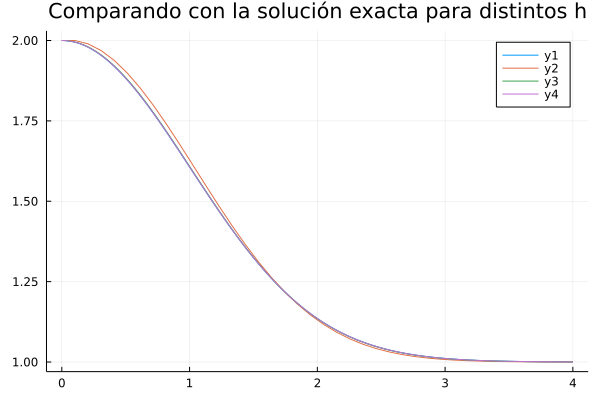

In [106]:
plot(a:0.01:b,ye,title="Comparando con la solución exacta para distintos h")
plot!(te1,we1[1,:])
plot!(te2,we2[1,:])
plot!(te3,we3[1,:])

***Con Runge-Kutta 4***

In [102]:
y0=[2.0]
a=0
b=4
N=40          ### h=0,1
p=0
f(1,y0,p)
t1,w1=iteracion_ODES_multidumencional(RK4,f,y0,(a,b),N,p)

([0.0, 0.10256410256410256, 0.20512820512820512, 0.3076923076923077, 0.41025641025641024, 0.5128205128205128, 0.6153846153846153, 0.7179487179487178, 0.8205128205128204, 0.9230769230769229  …  3.0769230769230784, 3.179487179487181, 3.2820512820512837, 3.3846153846153864, 3.487179487179489, 3.5897435897435916, 3.6923076923076943, 3.794871794871797, 3.8974358974358996, 4.000000000000002], [2.0 1.9947541103907813 … 1.0005033176688953 1.0003357450073658])

In [101]:
N=400          ### h=0,01
t2,w2=iteracion_ODES_multidumencional(RK4,f,y0,(a,b),N,p)

([0.0, 0.010025062656641603, 0.020050125313283207, 0.03007518796992481, 0.040100250626566414, 0.05012531328320802, 0.06015037593984962, 0.07017543859649122, 0.08020050125313283, 0.09022556390977443  …  3.909774436090183, 3.9197994987468245, 3.929824561403466, 3.9398496240601073, 3.9498746867167487, 3.95989974937339, 3.9699248120300314, 3.979949874686673, 3.989974937343314, 3.9999999999999556], [2.0 1.9999497503219226 … 1.0003491705957717 1.0003354626477314])

In [100]:
N=4000          ### h=0,001
t3,w3=iteracion_ODES_multidumencional(RK4,f,y0,(a,b),N,p)

([0.0, 0.001000250062515629, 0.002000500125031258, 0.003000750187546887, 0.004001000250062516, 0.005001250312578145, 0.0060015003750937745, 0.007001750437609404, 0.008002000500125032, 0.009002250562640661  …  3.990997749437097, 3.9919979994996124, 3.992998249562128, 3.9939984996246434, 3.994998749687159, 3.9959989997496743, 3.99699924981219, 3.9979994998747053, 3.9989997499372207, 3.999999999999736], [2.0 1.9999994997500314 … 1.0003368073341024 1.0003354626279042])

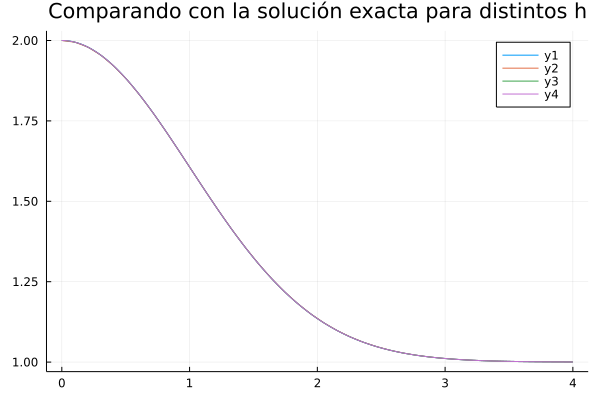

In [99]:
plot(a:0.01:b,ye,title="Comparando con la solución exacta para distintos h")
plot!(t1,w1[1,:])
plot!(t2,w2[1,:])
plot!(t3,w3[1,:])

***c)***

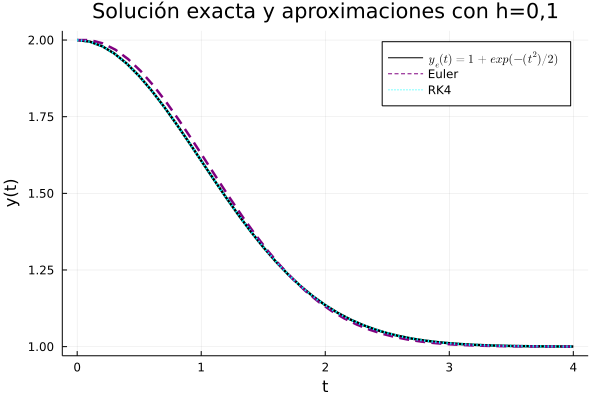

In [143]:
plot(title="Solución exacta y aproximaciones con h=0,1",xlabel="t",ylabel="y(t)")
plot!(a:0.1:b,ye,linecolor=:black,linewidth=2.5,label=L"y_e(t)=1+exp(-(t^2)/2)")
plot!(te1,we1[1,:],label="Euler",linestyle=:dash,linecolor=:purple,linewidth=2.5)
plot!(t1,w1[1,:],label="RK4",linestyle=:dot,linecolor=:cyan,linewidth=2.5)

***d)***

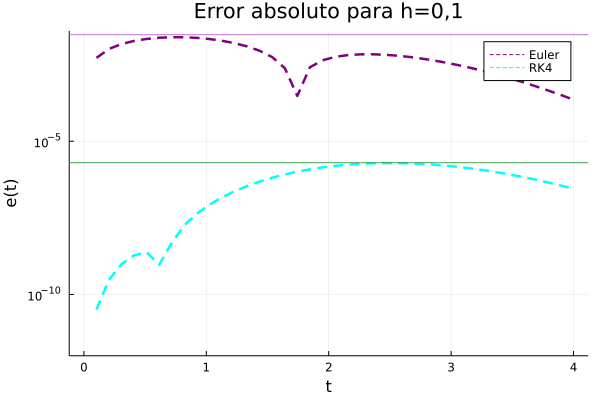

In [207]:
N=40
y1 = [ye(t1[n]) for n=1:N]
plot(title="Error absoluto para h=0,1",xlabel="t",ylabel="e(t)",yscale=:log10,ylim=(1e-12,0.04))
plot!(te1,abs.(we1[1,:]-y1),label="Euler",linestyle=:dash,linecolor=:purple,linewidth=2.5)
plot!(t1,abs.(w1[1,:]-y1),label="RK4",linestyle=:dash,linecolor=:cyan,linewidth=2.5)
hline!([2e-6],label="")
hline!([3e-2],label="")

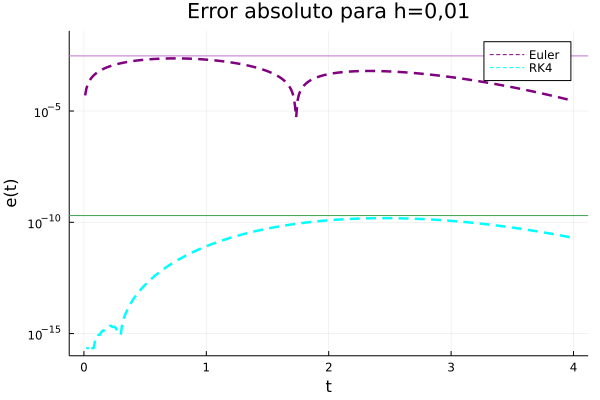

In [224]:
N=400
y1 = [ye(t2[n]) for n=1:N]
plot(title="Error absoluto para h=0,01",xlabel="t",ylabel="e(t)",yscale=:log10,ylim=(1e-16,0.04))
plot!(te2,abs.(we2[1,:]-y1),label="Euler",linestyle=:dash,linecolor=:purple,linewidth=2.5)
plot!(t2,abs.(w2[1,:]-y1),label="RK4",linestyle=:dash,linecolor=:cyan,linewidth=2.5)
hline!([2e-10],label="")
hline!([3e-3],label="")

***e)***

In [238]:
y=y0
p=0
ft=f(t1,y,p)

1-element Vector{Vector{Float64}}:
 [0.0, -0.10256410256410256, -0.20512820512820512, -0.3076923076923077, -0.41025641025641024, -0.5128205128205128, -0.6153846153846153, -0.7179487179487178, -0.8205128205128204, -0.9230769230769229  …  -3.0769230769230784, -3.179487179487181, -3.2820512820512837, -3.3846153846153864, -3.487179487179489, -3.5897435897435916, -3.6923076923076943, -3.794871794871797, -3.8974358974358996, -4.000000000000002]

In [242]:
length(ft[1])

40

In [249]:
(0.1-0.001)/40

0.002475

In [254]:
n=[i for i=1:4000]

4000-element Vector{Int64}:
    1
    2
    3
    4
    5
    6
    7
    8
    9
   10
   11
   12
   13
    ⋮
 3989
 3990
 3991
 3992
 3993
 3994
 3995
 3996
 3997
 3998
 3999
 4000

In [263]:
y0=[2.0]
a=0
b=4
p=0
t1=zeros(n,N)
w1=zeros(n,N)
for i=1:n
    N=n[i]
t1[i,:],w1[i,:]=iteracion_ODES_multidumencional(RK4,f,y0,(a,b),N,p)
end

LoadError: MethodError: no method matching zeros(::Vector{Int64}, ::Int64)
[0mClosest candidates are:
[0m  zeros([91m::Type{T}[39m, ::Union{Integer, AbstractUnitRange}...) where T at /opt/julias/julia-1.7/share/julia/base/array.jl:521
[0m  zeros([91m::Union{Integer, AbstractUnitRange}...[39m) at /opt/julias/julia-1.7/share/julia/base/array.jl:520

In [ ]:
function h(Metodo,f,y0,(a,b),N,p)

    return t[:],w[:,:]
end

In [248]:
N=40
y1 = [ye(t1[n]) for n=1:N]
plot(title="Error Global",xlabel="t",ylabel="e(t)",yscale=:log10,ylim=(-1000000,100000))
plot!(0.1:0.002475:0.001,abs.(we1[1,:]-ft[1]),label="Euler",linestyle=:dash,linecolor=:purple,linewidth=2.5)
#plot!(t1,abs.(w1[1,:]-y1),label="RK4",linestyle=:dash,linecolor=:cyan,linewidth=2.5)
#hline!([2e-6],label="")
#hline!([3e-2],label="")

┌ Warning: No strict ticks found
└ @ PlotUtils /home/rdpaula/.julia/packages/PlotUtils/jNTYY/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /home/rdpaula/.julia/packages/PlotUtils/jNTYY/src/ticks.jl:191


***f)***

**El metodo de RK4 es más preciso que el método de Euler.
En Euler la aproximacion se aleja de la solucion exacta si esta es creceinte, y si la solucion exacta decrece el metodo de Euler se estabiliza.**